## FastText CBOW



In [36]:
import pandas as pd
import numpy as np
import gensim
import utils
import warnings
%matplotlib inline
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
import seaborn as sns
import xgboost as xgb
import multiprocessing
from gensim.models import FastText
from sklearn import preprocessing
from gensim.models import Doc2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument



from utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import featureScore
from utils import folderPath
from utils import metrics
from utils import removeColumnContainString
from utils import Feature_Extraction
from utils import Normalizing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path='/content/drive/MyDrive/NLP/'
df=pd.read_csv(path + '3.csv')

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,caption,following,likes,posts_count,followers,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,...,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,caption_length,hashtag_popularity
0,0,0,possible thanks lateral flow testing fast simp...,964.0,14.0,47.0,1093.0,1,0,10,...,0.282576,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,NaN,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...","'stopwatch', 'page facing up', 'health worker:...",10,860,3219.750000
1,1,1,grateful kind words feedback receiving since s...,964.0,12.0,47.0,1093.0,1,0,14,...,0.168056,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,NaN,0,"['👏', '🧡']","'clapping hands', 'orange heart'",2,716,5178.333333
2,2,2,hand dived isle jura scallop smoked roe leek c...,308.0,100.0,343.0,4202.0,0,1,17,...,0.000000,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,NaN,0,[],NaN,0,425,17663.680000
3,3,3,jerusalem artichoke prepared first dessert mal...,308.0,81.0,343.0,4202.0,0,1,20,...,0.250000,"'#michelin', '#michelinstar', '#michelinuk', '...",28,NaN,0,[],NaN,0,490,16841.857143
4,4,4,main course seasonal 7 course menu borders roe...,308.0,146.0,343.0,4202.0,0,1,18,...,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],NaN,0,530,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,41736,41736,alongside hospitality performing arts also mas...,599.0,4079.0,1933.0,167394.0,0,1,17,...,0.428030,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],NaN,0,878,153640.333333
41737,41737,41737,isnt looking forward waking beautiful nights s...,599.0,1621.0,1933.0,167394.0,0,1,14,...,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],'bottle with popping cork',1,532,81714.428571
41738,41738,41738,missing london town heres shot really showcase...,599.0,1548.0,1933.0,167394.0,0,1,12,...,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],NaN,0,479,102699.125000
41739,41739,41739,closed going try keep happy inspired mix beaut...,599.0,2637.0,1933.0,167394.0,0,1,13,...,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,NaN,0,[],NaN,0,643,70165.571429


In [5]:
df.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [6]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextCBOWCaption = FastText(tokenized_caption, 
                     size=100, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=0  # 0 for CBOW model
                     )

modelFastTextCBOWCaption.build_vocab(tokenized_caption, update=True)
modelFastTextCBOWCaption.train(tokenized_caption, total_examples= len(tokenized_caption), epochs=20)

In [7]:
modelFastTextCBOWCaption.wv.most_similar("Gastroenteritis")

[('gastroenterologist', 0.8055967092514038),
 ('gastroenterology', 0.7883971929550171),
 ('gastroenterologists', 0.7795230746269226),
 ('neurologist', 0.6638781428337097),
 ('urologist', 0.6551284790039062),
 ('urology', 0.6442322731018066),
 ('urologists', 0.6412497758865356),
 ('ophthalmologist', 0.6322267055511475),
 ('ophthalmologists', 0.6228265762329102),
 ('gynaecologist', 0.6191452741622925)]

In [8]:
modelFastTextCBOWCaption.wv.most_similar("pizza")

[('pizzazz', 0.972661018371582),
 ('pizzaioli', 0.8575906753540039),
 ('pizzas', 0.8530306816101074),
 ('atpizzatogo', 0.8396368026733398),
 ('pizzavegan', 0.8350525498390198),
 ('prepizza', 0.8017687797546387),
 ('piazza', 0.7750401496887207),
 ('pizzerias', 0.7334417104721069),
 ('pizzapoints', 0.7210848927497864),
 ('pizzette', 0.7198596000671387)]

In [9]:
# modelFastTextSkipGramCaption.save(path+ "Save Models\\200_fastText_Skipgram_Caption.model")

In [10]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [11]:
wordvec_arrays = np.zeros((len(tokenized_caption), 100)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays[i,:] = word_vector(tokenized_caption[i], 100,modelFastTextCBOWCaption)
wordvec_caption = pd.DataFrame(wordvec_arrays)
wordvec_caption.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 100)

## Hashtags

In [12]:
tokenized_hastags = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextCBOWHastags = FastText(tokenized_hastags, 
                     size=100, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=0  # 0 for CBOW model
                     )

modelFastTextCBOWHastags.build_vocab(tokenized_hastags, update=True)
modelFastTextCBOWHastags.train(tokenized_hastags, total_examples= len(tokenized_hastags), epochs=20)

In [16]:
modelFastTextCBOWHastags.wv.most_similar("Gastroenteritis")

[("'#newyearseveparty',", 0.5972260236740112),
 ("'#newyearparty',", 0.5834695100784302),
 ("'#newyorkbar'", 0.5716984272003174),
 ("'#newyearsparty',", 0.5697892904281616),
 ("'#newvictoriafamily',", 0.5498729944229126),
 ("'#newyearseve'", 0.5426405668258667),
 ("'#newyear'", 0.5347369909286499),
 ("'#newyear2021',", 0.5307122468948364),
 ("'#newyear2022'", 0.5294221043586731),
 ("'#newyearseve2021',", 0.5276740789413452)]

In [19]:
# modelFastTextCBOWHastags.save(path+ "Save Models\\200_fastText_Skipgram_Hashtags.model")

In [18]:
wordvec_arrays = np.zeros((len(tokenized_hastags), 100)) 
for i in range(len(tokenized_hastags)):
    wordvec_arrays[i,:] = word_vector(tokenized_hastags[i], 100,modelFastTextCBOWHastags)
wordvec_Hashtag = pd.DataFrame(wordvec_arrays)
wordvec_Hashtag.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 100)

### emojiText

In [20]:
tokenized_emojiText = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextCBOWEmojiText = FastText(tokenized_emojiText, 
                     size=100, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=0  # 0 for CBOW model
                     )

modelFastTextCBOWEmojiText.build_vocab(tokenized_emojiText, update=True)
modelFastTextCBOWEmojiText.train(tokenized_emojiText, total_examples= len(tokenized_emojiText), epochs=20)

In [21]:
modelFastTextCBOWHastags.wv.most_similar("Gastroenteritis")

[("'#newyearseveparty',", 0.5972260236740112),
 ("'#newyearparty',", 0.5834695100784302),
 ("'#newyorkbar'", 0.5716984272003174),
 ("'#newyearsparty',", 0.5697892904281616),
 ("'#newvictoriafamily',", 0.5498729944229126),
 ("'#newyearseve'", 0.5426405668258667),
 ("'#newyear'", 0.5347369909286499),
 ("'#newyear2021',", 0.5307122468948364),
 ("'#newyear2022'", 0.5294221043586731),
 ("'#newyearseve2021',", 0.5276740789413452)]

In [22]:
wordvec_arrays = np.zeros((len(tokenized_emojiText), 100)) 
for i in range(len(tokenized_emojiText)):
    wordvec_arrays[i,:] = word_vector(tokenized_emojiText[i], 100,modelFastTextCBOWEmojiText)
wordvec_emojiText = pd.DataFrame(wordvec_arrays)
wordvec_emojiText.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 100)

## mentions

In [23]:
tokenized_mentions = df['mentions'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextCBOWMentions = FastText(tokenized_mentions, 
                     size=100, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=0  # 0 for CBOW model
                     )

modelFastTextCBOWMentions.build_vocab(tokenized_mentions, update=True)
modelFastTextCBOWMentions.train(tokenized_mentions, total_examples= len(tokenized_mentions), epochs=20)

In [24]:
modelFastTextCBOWMentions.wv.most_similar("Gastroenteritis")

[("'@thaisquaregroup'", 0.9837063550949097),
 ("'@thefreeplasticsurgery',", 0.9833018183708191),
 ("'@thefreeplasticsurgery'", 0.983173668384552),
 ("'@that_havelock_guy',", 0.9829448461532593),
 ("'@terry_robertson'", 0.9829422235488892),
 ("'@the_victoria_foundation_uk'", 0.9825928211212158),
 ("'@lottisamsterdam',", 0.9825525283813477),
 ("'@thelovelyclinic',", 0.9824851155281067),
 ("'@tellyourstory'", 0.982404351234436),
 ("'@shayandoesart'", 0.9823678731918335)]

In [25]:
# modelFastTextCBOWMentions.save(path+ "Save Models\\200_fastText_Skipgram_Hashtags.model")

In [26]:
wordvec_arrays = np.zeros((len(tokenized_mentions), 100)) 
for i in range(len(tokenized_mentions)):
    wordvec_arrays[i,:] = word_vector(tokenized_mentions[i], 100,modelFastTextCBOWMentions)
wordvec_Mentions = pd.DataFrame(wordvec_arrays)
wordvec_Mentions.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 100)

In [27]:
fastText_Df = pd.DataFrame(np.hstack((wordvec_caption,wordvec_Hashtag,wordvec_emojiText,wordvec_Mentions, df)))

In [28]:
fastText_Df

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
0,-0.236308,0.379891,-0.753415,-0.570465,0.350142,0.125488,0.799853,0.047326,0.07319,-0.391421,...,0.282576,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,NaN,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...","'stopwatch', 'page facing up', 'health worker:...",10,860,3219.75
1,-0.534396,-0.114914,-0.982162,0.260007,0.425197,-0.109105,1.148439,0.024765,0.428252,-0.27342,...,0.168056,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,NaN,0,"['👏', '🧡']","'clapping hands', 'orange heart'",2,716,5178.333333
2,0.14192,-0.212591,-0.108975,-0.417726,0.190459,0.179606,-0.137344,-0.154827,-0.230301,-1.525851,...,0.0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,NaN,0,[],NaN,0,425,17663.68
3,0.178634,-0.552074,0.446222,-1.020336,0.398646,0.172215,0.142938,-0.275929,-0.020238,-1.335561,...,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,NaN,0,[],NaN,0,490,16841.857143
4,-0.041564,0.112879,0.015364,-1.394916,0.83218,-1.473829,0.303428,-0.548459,-0.721041,-1.809375,...,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],NaN,0,530,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,-0.415372,0.016413,-0.484729,-0.08901,0.603275,-0.580353,1.429896,0.239603,-0.136125,-0.526149,...,0.42803,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],NaN,0,878,153640.333333
41737,0.207588,0.219672,-0.595949,-0.699844,0.371053,-0.133015,1.097791,0.014302,-0.36654,-0.429172,...,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],'bottle with popping cork',1,532,81714.428571
41738,-0.276087,-0.076594,-0.221646,-0.547778,0.588565,-0.171639,1.133811,0.403659,0.189507,-0.615125,...,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],NaN,0,479,102699.125
41739,-0.295455,-0.087928,-0.209261,-0.162645,0.587224,-0.569061,1.30594,-0.008413,-0.014721,-0.848574,...,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,NaN,0,[],NaN,0,643,70165.571429


In [29]:
print(len(fastText_Df.columns))
a=len(fastText_Df.columns)-25+1
print(a)
fastText_Df[len(fastText_Df.columns)-28+1]
fastText_Df.rename(columns = {a:'likes'}, inplace = True)
df=utils.removeColumnContainString(fastText_Df)

427
403
Couldn't covert 401 to float
Couldn't covert 418 to float
Couldn't covert 420 to float
Couldn't covert 422 to float
Couldn't covert 423 to float


In [30]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [31]:
y=normalized_df['likes']                #Target Variable 
X = normalized_df.drop('likes', axis=1) #Feature Matrix 

In [32]:
x_train_fastText_df, x_test_fastText_df, y_train_fastText_df, y_test_fastText_df = train_test_split(X, y, test_size=0.2)

###XgBoost

In [33]:
# utils.hyperparameterTuning_XGBoost(x_train_w2v_df,y_train_w2v_df)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_fastText_df, y_train_fastText_df)
y_pred_fastText_xgboost = xg_reg.predict(x_test_fastText_df)

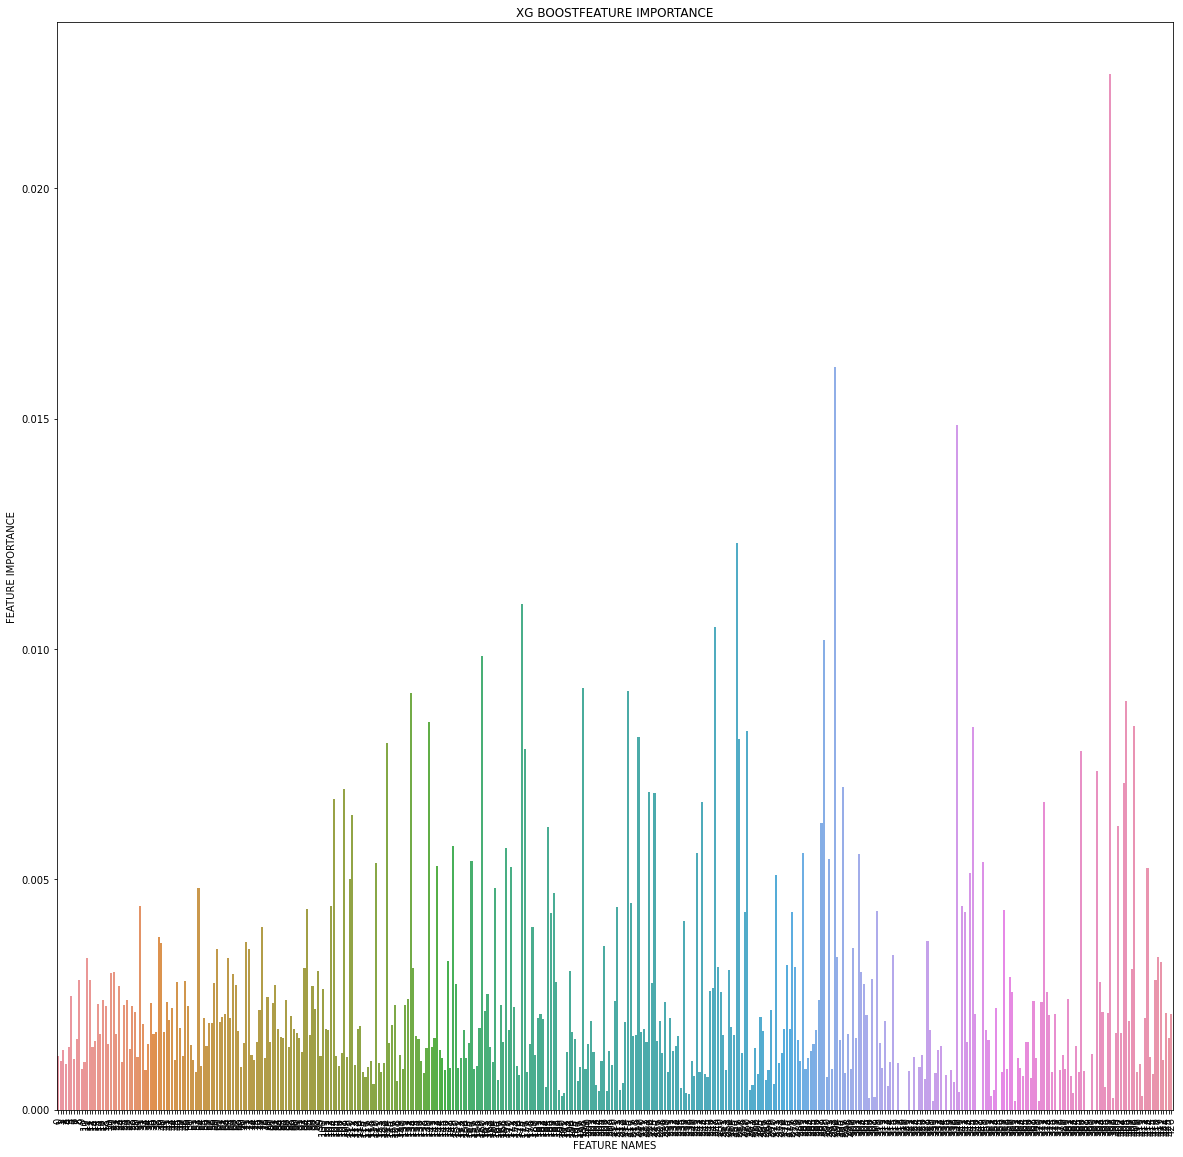

In [37]:
plot_feature_importance(xg_reg.feature_importances_,x_train_fastText_df.columns,'XG BOOST')

In [38]:
featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00117
Feature: 1, Score: 0.00107
Feature: 2, Score: 0.00129
Feature: 3, Score: 0.00099
Feature: 4, Score: 0.00136
Feature: 5, Score: 0.00246
Feature: 6, Score: 0.00111
Feature: 7, Score: 0.00155
Feature: 8, Score: 0.00282
Feature: 9, Score: 0.00088
Feature: 10, Score: 0.00104
Feature: 11, Score: 0.00329
Feature: 12, Score: 0.00283
Feature: 13, Score: 0.00135
Feature: 14, Score: 0.00150
Feature: 15, Score: 0.00230
Feature: 16, Score: 0.00164
Feature: 17, Score: 0.00239
Feature: 18, Score: 0.00225
Feature: 19, Score: 0.00143
Feature: 20, Score: 0.00297
Feature: 21, Score: 0.00299
Feature: 22, Score: 0.00163
Feature: 23, Score: 0.00268
Feature: 24, Score: 0.00104
Feature: 25, Score: 0.00227
Feature: 26, Score: 0.00239
Feature: 27, Score: 0.00131
Feature: 28, Score: 0.00224
Feature: 29, Score: 0.00211
Feature: 30, Score: 0.00114
Feature: 31, Score: 0.00443
Feature: 32, Score: 0.00185
Feature: 33, Score: 0.00087
Feature: 34, Score: 0.00142
Feature: 35, Score: 0.00231
Fe

In [39]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_fastText_xgboost)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### Random Forest

In [40]:
# utils.hyperparameterTuning_RandomForest(x_train_w2v_df,y_train_w2v_df)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_fastText_df, y_train_fastText_df)
y_pred_fastText_rnd = rnd_clf.predict(x_test_fastText_df)

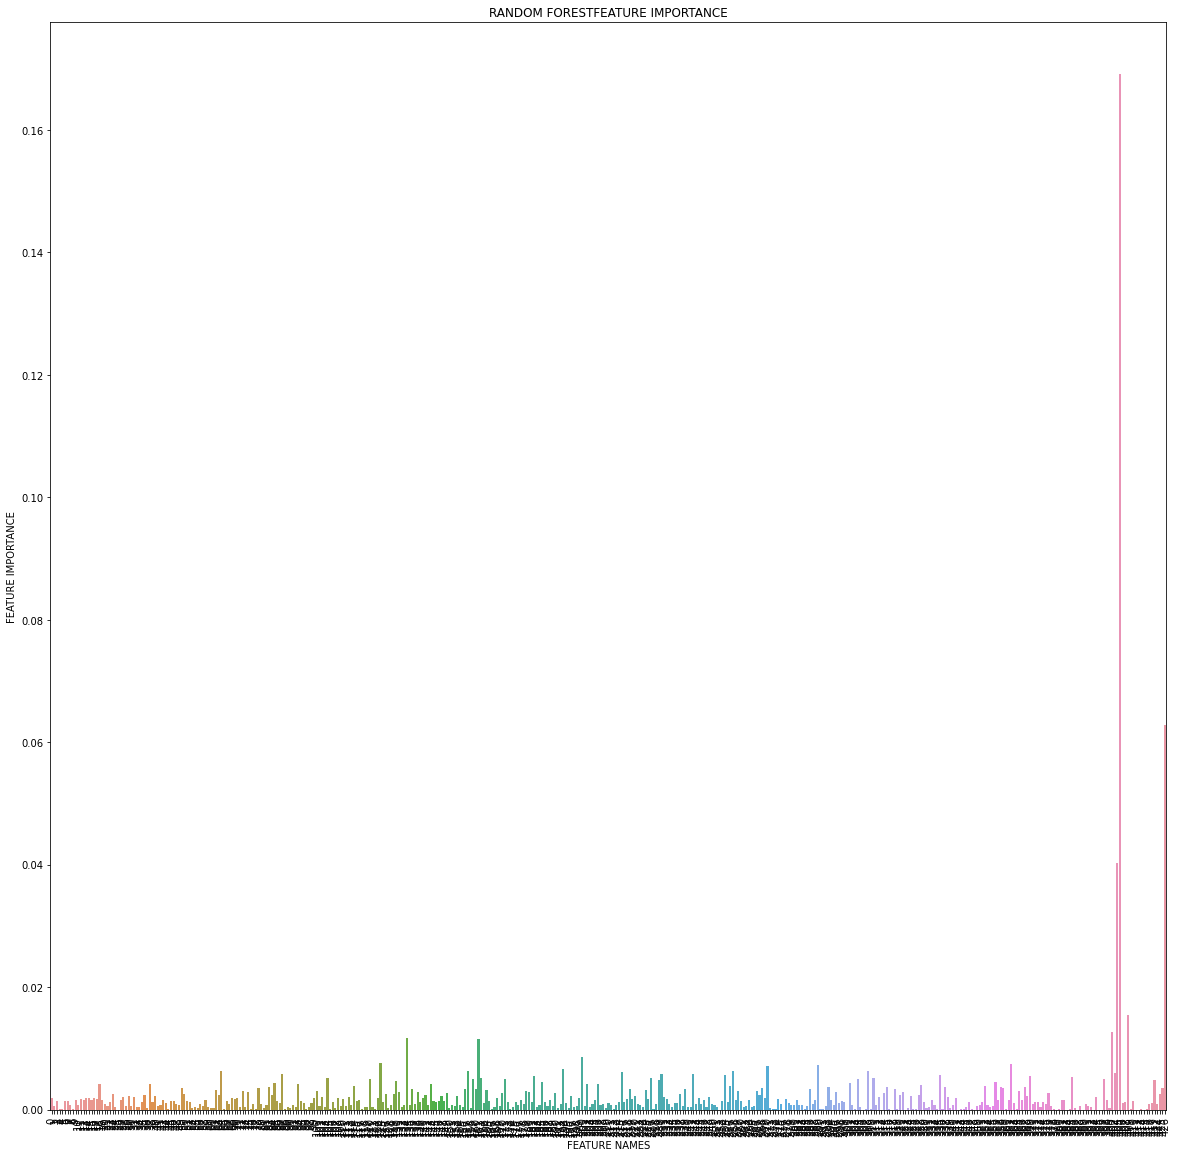

In [41]:
plot_feature_importance(rnd_clf.feature_importances_,x_train_fastText_df.columns,'RANDOM FOREST')

In [42]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_fastText_rnd)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### MLP

In [43]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam')
mlp_GS.fit(x_train_fastText_df, y_train_fastText_df)
y_pred_fastText_mlp = mlp_GS.predict(x_test_fastText_df)

In [44]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_fastText_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### SVC

In [45]:
from sklearn.svm import LinearSVR
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0)
svr.fit(x_train_fastText_df, y_train_fastText_df)
y_pred_fastText_SVR = svr.predict(x_test_fastText_df)

In [46]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_fastText_SVR)

dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [47]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,XGboost,0.029699,0.558002,0.009049,-3.516634,0.883420
1,Random Forest,0.036445,0.334415,0.012176,-3.311953,0.915189
2,MLP,0.035895,0.354340,0.012704,-3.327150,0.848450
3,SVR,0.047002,-0.107058,0.014617,-3.057556,0.936400
